In [3]:
from graphviz import Source
from abc import ABC, abstractmethod
import numpy as np
import importlib
import dijkstar as djks

In [6]:
import classes_and_functions as cf

In [7]:
importlib.reload(cf)

<module 'classes_and_functions' from '/Users/gaby/Documents/Op_research/1_graphs/classes_and_functions.py'>

# Test functionality

{'b', 'c', 'a', 'd'}
{'a': {'b': 3}, 'c': {'d': 3}}
3
None
['b']
['c']


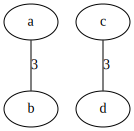

In [8]:
g = cf.UndirectedGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')
print(g._nodes)
g.add_distance('a','b',3)
g.add_distance('d','c',3)
print(g._distances)
print(g.get_distance('c', 'd')) #3 inverted
print(g.get_distance('d', 'b'))#None
print(g.get_adjacents_nodes('a'))
print(g.get_adjacents_nodes('d'))
g.render()

# Dijkstra Exercise

In [11]:
importlib.reload(cf)

<module 'classes_and_functions' from '/Users/gaby/Documents/Op_research/1_graphs/classes_and_functions.py'>

{'b', 'c', 'a', 'd'}
{'a': {'b': 4, 'c': 3}, 'c': {'d': 7}, 'b': {'d': 5}}


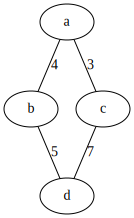

In [12]:
g = cf.UndirectedGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')
g.add_distance('a','b',4)
g.add_distance('a','c',3)
#g.add_distance('b','c',0)
g.add_distance('d','c',7)
g.add_distance('b','d',5)
print(g._nodes)
print(g._distances)
g.render()

In [13]:
origin = 'a'
destiny = 'd'
cf.dijkstra(g, origin, destiny)

[['a', 'b', 'd'], {'b': 4, 'c': 3, 'd': 9}]

## Check with python library 

In [14]:

graph = djks.Graph()
graph.add_edge('a', 'b', 4)
graph.add_edge('b', 'd', 5)
graph.add_edge('a', 'c', 3)
graph.add_edge('c', 'd', 7)

djks.find_path(graph, 'a', 'd')

PathInfo(nodes=['a', 'b', 'd'], edges=[4, 5], costs=[4, 5], total_cost=9)

## A longer example

In [15]:
importlib.reload(cf)

<module 'classes_and_functions' from '/Users/gaby/Documents/Op_research/1_graphs/classes_and_functions.py'>

{'e', 'f', 'c', 'd', 'a', 'b', 'g'}
{'a': {'b': 4, 'c': 3, 'e': 7}, 'b': {'c': 6, 'd': 5}, 'c': {'e': 3, 'd': 11}, 'd': {'e': 2, 'f': 2, 'g': 10}, 'e': {'g': 5}, 'f': {'g': 3}}


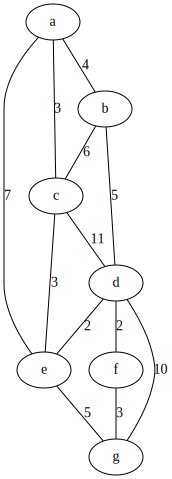

In [16]:
g = cf.UndirectedGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')
g.add_node('e')
g.add_node('f')
g.add_node('g')

g.add_distance('a','b',4)
g.add_distance('a','c',3)
g.add_distance('a','e',7)
g.add_distance('b','c',6)
g.add_distance('b','d',5)
g.add_distance('c','e',3)
g.add_distance('c','d',11)
g.add_distance('d','e',2)
g.add_distance('d','f',2)
g.add_distance('d','g',10)
g.add_distance('e','g',5)
g.add_distance('f','g',3)
print(g._nodes)
print(g._distances)
g.render()

In [17]:
origin = 'a'
destiny = 'g'
cf.dijkstra(g, origin, destiny)

[['a', 'c', 'e', 'g'], {'b': 4, 'e': 6, 'c': 3, 'd': 8, 'g': 11, 'f': 10}]

In [18]:
origin = 'a'
destiny = 'f'
cf.dijkstra(g, origin, destiny)

[['a', 'c', 'e', 'd', 'f'], {'b': 4, 'e': 6, 'c': 3, 'd': 8, 'g': 11, 'f': 10}]

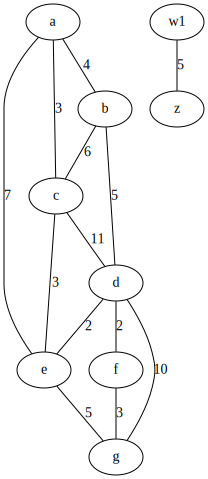

In [46]:
g.add_node('z')
g.add_node('w1')
g.add_distance('z','w1',5)
g.render()

In [47]:
origin = 'w1'
destiny = 'z'
cf.dijkstra(g, origin, destiny)

visited: w1
adjacents: {'z'}
distances: {'z': 5}
already_visited; ['w1']


[['w1', 'z'], {'z': 5}]

In [19]:
origin = 'a'
destiny = 'z1'
cf.dijkstra(g, origin, destiny)

"destiny or origin don't exist"

{'3', '5', '1', '6', '4', '2'}
{'1': {'2': 2, '3': 4}, '2': {'4': 3}, '5': {'2': 8, '6': 5}, '4': {'5': 0}, '6': {'4': 3}, '3': {'6': 1}}


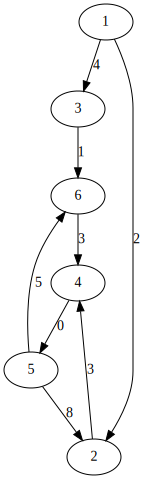

In [20]:
g = cf.DiGraph()

g.add_node('1')
g.add_node('2')
g.add_node('3')
g.add_node('4')
g.add_node('5')
g.add_node('6')

g.add_distance('1','2',2)
g.add_distance('1','3',4)
g.add_distance('2','4',3)
g.add_distance('5','2',8)
g.add_distance('4','5',0)
g.add_distance('5','6',5)
g.add_distance('6','4',3)
g.add_distance('3','6',1)
print(g._nodes)
print(g._distances)
g.render()

In [21]:
origin = '1'
destiny = '6'
cf.dijkstra(g, origin, destiny)

[['1', '3', '6'], {'3': 4, '2': 2, '4': 5, '6': 5, '5': 5}]

# Path with negative costs

### Dijkstra doesn't work for negative paths
### --> Bellman-Ford's algorithm

[['a', 'b', 'd'], {'b': 1, 'c': 3, 'd': 2}]


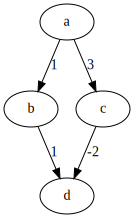

In [22]:
g = cf.DiGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')

g.add_distance('a','b',1)
g.add_distance('b','d',1)
g.add_distance('a','c',3)
g.add_distance('c','d',-2)
origin = 'a'
destiny = 'd'
print(cf.dijkstra(g, origin, destiny))

g.render()


[['a', 'c', 'e', 'f'], {'b': 1, 'c': 3, 'd': 6, 'e': 5, 'f': 5}]


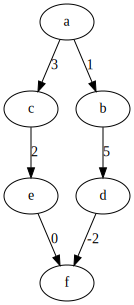

In [25]:
g = cf.DiGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')
g.add_node('e')
g.add_node('f')

g.add_distance('a','b',1)
g.add_distance('b','d',5)
g.add_distance('a','c',3)
g.add_distance('c','e',2)
g.add_distance('d','f',-2)
g.add_distance('e','f',0)

origin = 'a'
destiny = 'f'
print(cf.dijkstra(g, origin, destiny))

g.render()